# 新生儿健康分类预测示例

## 一、项目概述

### 数据来源

Kaggle平台 地址：https://www.kaggle.com/andrewmvd/fetal-health-classification

### 背景介绍

心电图 (CTG) 是一种评估胎儿健康的简单的方式，可让医疗保健专业人员采取行动以防止胎儿和孕产妇死亡。 

该设备本身通过发送超声波脉冲并读取其响应来工作，从而显示胎儿心率 (FHR)、胎动、子宫收缩等。

### 任务

创建一个模型来对心宫图 (CTG) 检查的结果（代表胎儿的健康状况）进行分类。

## 二、数据探索与处理

### 读取数据

In [41]:
#导入工具包
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf',size=14)
sns.set(font=myfont.get_name())
import warnings
warnings.filterwarnings("ignore")

#导入数据集
data = pd.read_csv(r'D:\Chorme Downloads\fetal_health.csv')

In [9]:
data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


数据共计2126行，22个特征

### 查看是否有缺失值

In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


可以看到该数据所有特征都没有缺失值

### 删除重复值

In [42]:
data_dup=data.copy()
data_dup.drop_duplicates(inplace=True)
print('重复样本共计:', data.shape[0] - data_dup.shape[0])
data=data_dup.copy()
data

重复样本共计: 13


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


### 特征理解

此网站解释了胎儿的正常情况：https://www.healthline.com/health/pregnancy/abnormal-fetal-heart-tracings
在Kaggle网站上理解每列特征含义如下：

特征：
'baseline value'- FHR baseline (beats per minute) 新生儿每分钟心跳次数
'accelerations'- Number of accelerations per second 心跳每秒增加次数
'fetal_movement'- Number of fetal movements per second 每秒胎动次数
'uterine_contractions'- Number of uterine contractions per second 每秒子宫收缩次数
'light_decelerations'- Number of light decelerations per second 轻微胎心下降
'severe_decelerations'- Number of severe decelerations per second 严重胎心下降
'prolongued_decelerations'- Number of prolonged decelerations per second 延迟胎心下降
'abnormal_short_term_variability'- Percentage of time with abnormal short term variability 胎心异常短期变化时间比
'mean_value_of_short_term_variability'- Mean value of short term variability 短期变化率均值
'percentage_of_time_with_abnormal_long_term_variability'- Percentage of time with abnormal long term variability 胎心异常长期变化率时间比
'mean_value_of_long_term_variability'- Mean value of long term variability 长期变化率均值
'histogram_width'- Width of FHR histogram
'histogram_min'- Minimum (low frequency) of FHR histogram
'histogram_max'- Maximum (high frequency) of FHR histogram
'histogram_number_of_peaks'- Number of histogram peaks
'histogram_number_of_zeroes'- Number of histogram zeros
'histogram_mode'- Histogram mode
'histogram_mean'- Histogram mean
'histogram_median'- Histogram median
'histogram_variance'- Histogram variance
'histogram_tendency'- Histogram tendency

标签：
'fetal_health' Tagged as 1 (Normal), 2 (Suspect) and 3 (Pathological) 1正常 2疑似 3病理

### 查看样本标签分布情况

<AxesSubplot:xlabel='fetal_health', ylabel='count'>

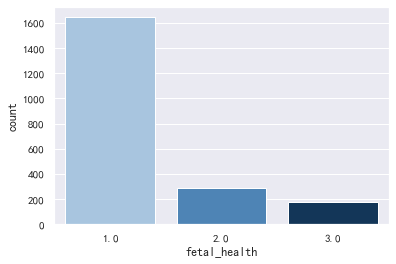

In [43]:
colours=["#9fc5e8", "#3d85c6", "#073763"]
sns.countplot(data= data, x="fetal_health",palette=colours)

In [44]:
data['fetal_health'].value_counts()

1.0    1646
2.0     292
3.0     175
Name: fetal_health, dtype: int64

可以看出样本分布不均匀，正常样本占了大多数

## 三、建模分析

### 模型选取

由于数据集不平衡，优先考虑集成分类器，如Random Forest等
这个网站给出了详细的介绍：https://www.cnblogs.com/kamekin/p/9824294.html
本文采取了Random Forest、XGBoost两种模型来进行学习预测，并进行模型评估

In [32]:
from sklearn.ensemble import RandomForestClassifier    #随机森林
from sklearn.model_selection import train_test_split   #划分数据集
from xgboost import XGBClassifier                      #xgboost分类器
from sklearn.metrics import classification_report, confusion_matrix #分类报告和混淆矩阵
from sklearn.model_selection import GridSearchCV       #网格搜索，用来搜索最佳参数
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold

### 特征选取

数据集的特征很多，在不删除任何特征的情况下先来看看各个特征之间的关联度。

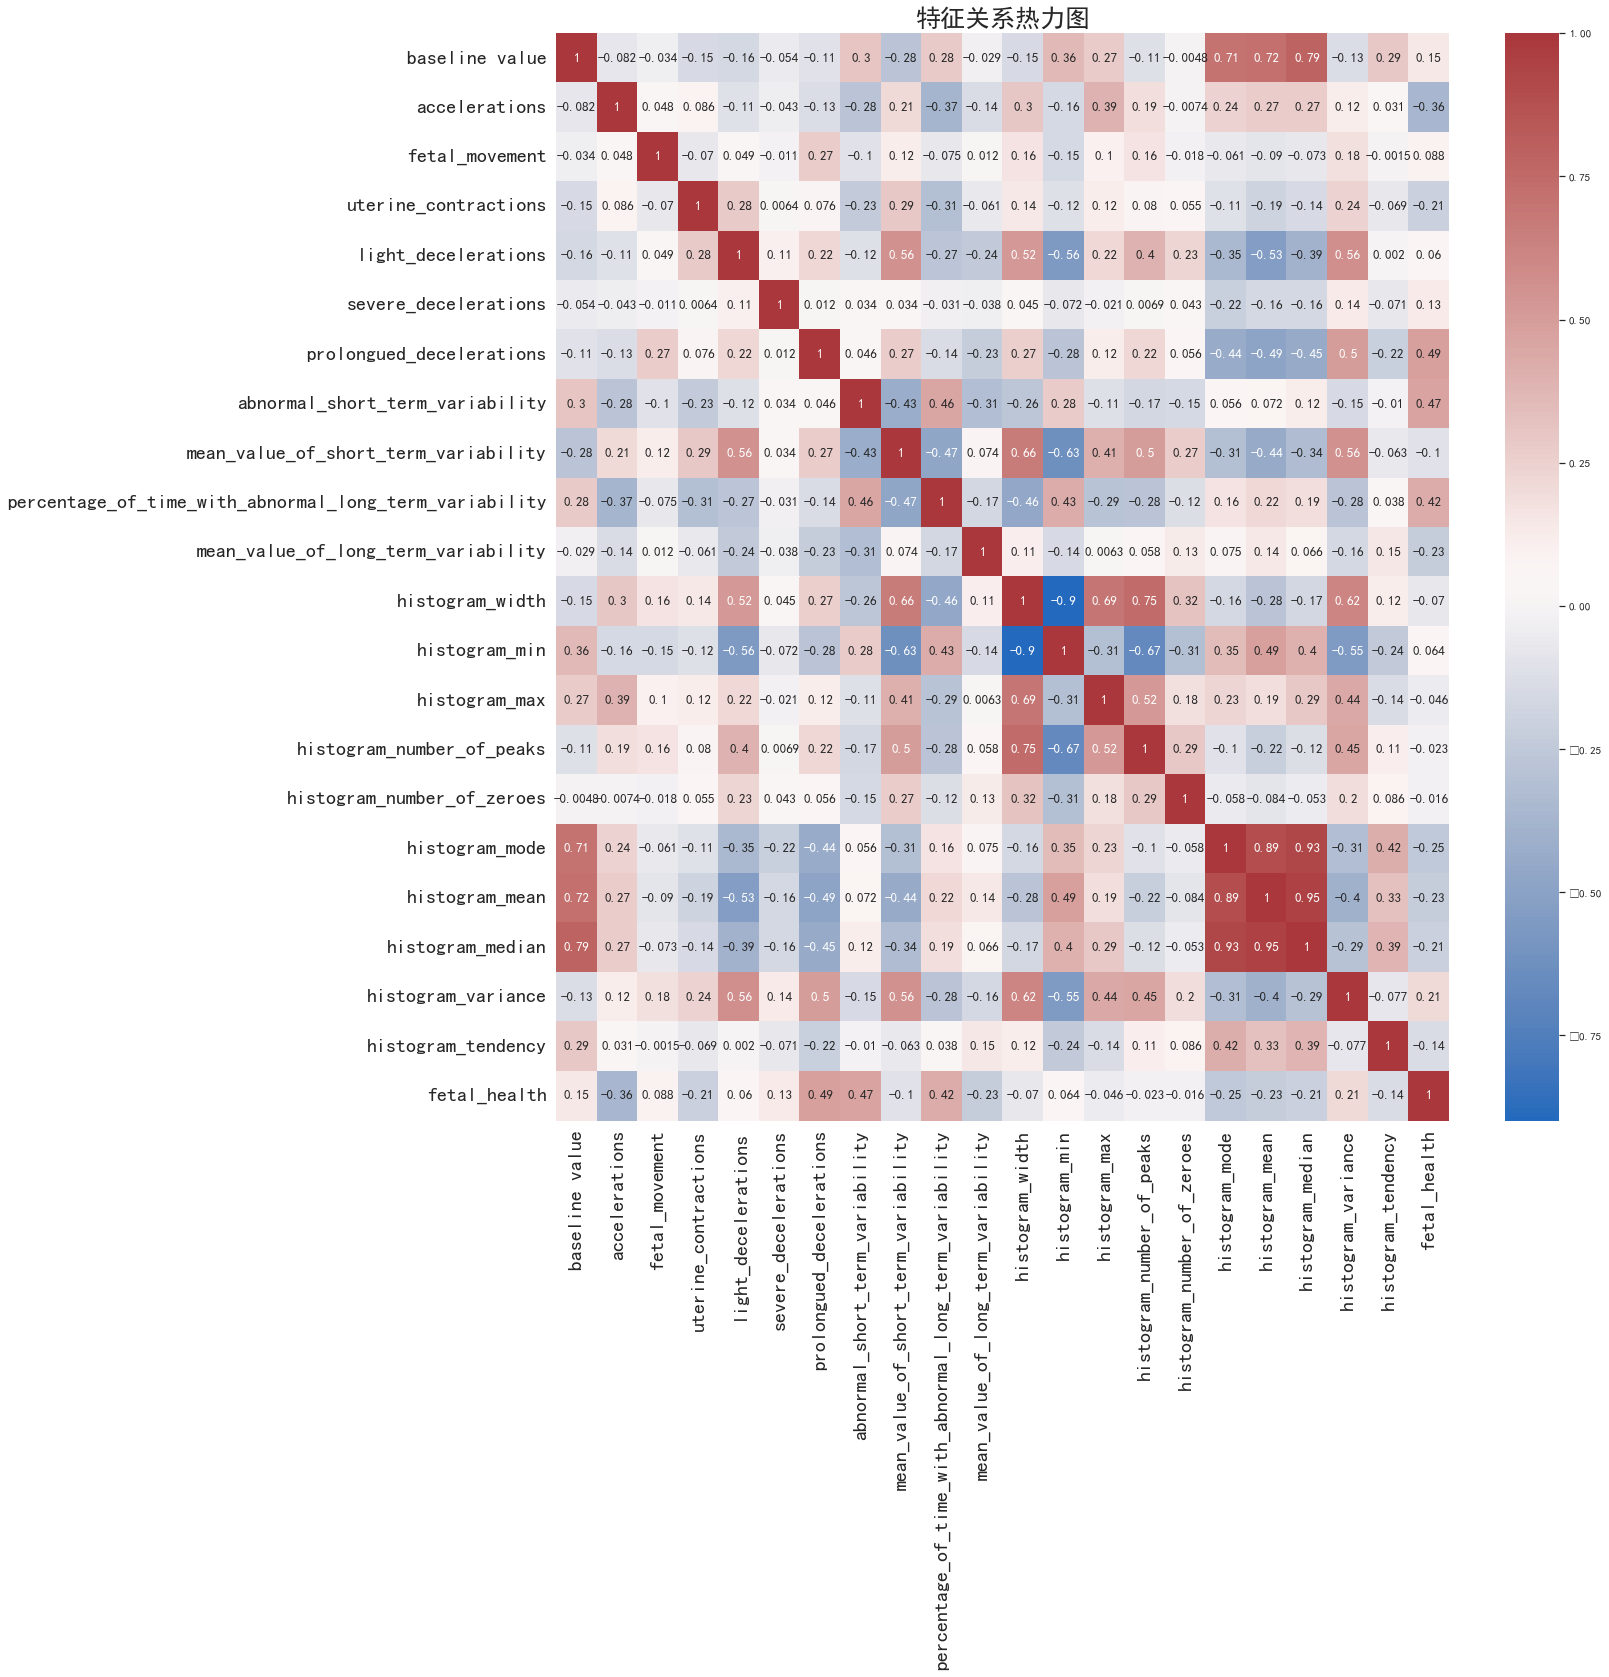

In [45]:
plt.figure(figsize=(20,20))
plt.title("特征关系热力图",fontsize=25,fontweight='bold')
sns.heatmap(data.corr(),cmap="vlag",annot=True,annot_kws={'size':13})
plt.yticks(fontweight='bold',fontsize=20)
plt.xticks(fontweight='bold',fontsize=20)
plt.show()

可以看出'prolongued_decelerations'，'abnormal_short_term_variability'，'percentage_of_time_with_abnormal_long_term_variability'这几个特征与目标变量相关度最高，但是相关并不代表因果关系。

### 切分数据集

In [54]:
X = data.drop(['fetal_health'], axis=1)
y = data['fetal_health']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Random Forest训练以及评估

In [86]:
#生成随机森林分类器
model = RandomForestClassifier()

#模型训练以及测试分数
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9584120982986768

搜索最佳参数

In [67]:
cv_method = StratifiedKFold(n_splits=3
                            )
params_RF = {"min_samples_split": [2, 6, 20],
             "min_samples_leaf": [1, 4, 16],
             "n_estimators" :[100,150, 200, 250],
             "criterion": ["gini"]    #这里选用gini指数         
            }


GridSearchCV_RF = GridSearchCV(estimator=RandomForestClassifier(), 
                                param_grid=params_RF, 
                                cv=cv_method,
                                n_jobs=2,
                                scoring="accuracy"
                                )

In [68]:
GridSearchCV_RF.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'criterion': ['gini'], 'min_samples_leaf': [1, 4, 16],
                         'min_samples_split': [2, 6, 20],
                         'n_estimators': [100, 150, 200, 250]},
             scoring='accuracy')

打印最佳参数

In [69]:
best_params_RF = GridSearchCV_RF.best_params_
best_params_RF

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

使用最佳参数再次对模型进行训练和预测

In [87]:
rf = RandomForestClassifier(criterion="gini", n_estimators = 150, min_samples_leaf=1, min_samples_split=2, random_state=42)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9603024574669187

打印分类报告

In [83]:
pred_rf = rf.predict(X_test)

In [84]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

         1.0       0.97      0.98      0.98       420
         2.0       0.91      0.79      0.85        73
         3.0       0.90      1.00      0.95        36

    accuracy                           0.96       529
   macro avg       0.93      0.93      0.92       529
weighted avg       0.96      0.96      0.96       529



F1指标，为了综合考量召回率和精确率，计算Precision 和 Recall 的调和平均数
F1 measure = 2 / (1/Precision)+(1/Recall)

绘制混淆矩阵图

[Text(0.5, 0, '正常'), Text(1.5, 0, '疑似'), Text(2.5, 0, '病理')]

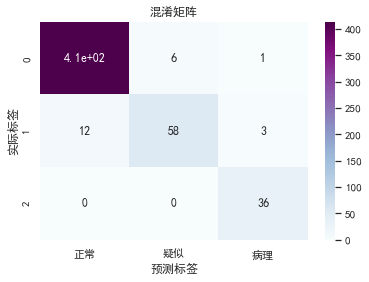

In [89]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_rf), annot=True, ax = ax, cmap = "BuPu")


ax.set_xlabel("预测标签")
ax.set_ylabel("实际标签")
ax.set_title("混淆矩阵")
ax.xaxis.set_ticklabels(["正常", "疑似", "病理"])

二分类混淆矩阵：

假阳性和假阴性。
假阳性：良性， Positive
假阴性：恶性， Negative

准确性Accuracy = True positive + True negative / Tp + Tn + Fp + Fn
精确率Precision = True positive / True positive + False positive
召回率Recall = True positive / True positive + False negative

可以看出随机森林分类器对假阳性和假阴性的分类都不错。

### XG Boost

生成相xgboost分类器并进行训练和测试

In [90]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

[18:12:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9640831758034026

In [91]:
pred_xgb = xgb.predict(X_test)

In [92]:
print("Classification Report")
print(classification_report(y_test, pred_xgb))

Classification Report
              precision    recall  f1-score   support

         1.0       0.98      0.98      0.98       420
         2.0       0.91      0.84      0.87        73
         3.0       0.92      1.00      0.96        36

    accuracy                           0.96       529
   macro avg       0.94      0.94      0.94       529
weighted avg       0.96      0.96      0.96       529



[Text(0.5, 0, '正常'), Text(1.5, 0, '疑似'), Text(2.5, 0, '病理')]

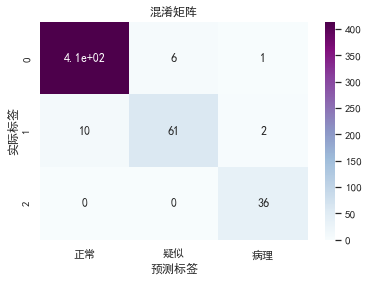

In [93]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_xgb), annot=True, ax = ax, cmap = "BuPu")


ax.set_xlabel("预测标签")
ax.set_ylabel("实际标签")
ax.set_title("混淆矩阵")
ax.xaxis.set_ticklabels(["正常", "疑似", "病理"])

可以看到XG boost无论是分类正确率，还是对假阳性假阴性，表现都很好，确实是很强的分类器。

## 四、删掉一些特征的分类情况

In [33]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import f_classif 

<AxesSubplot:xlabel='Score', ylabel='Feature'>

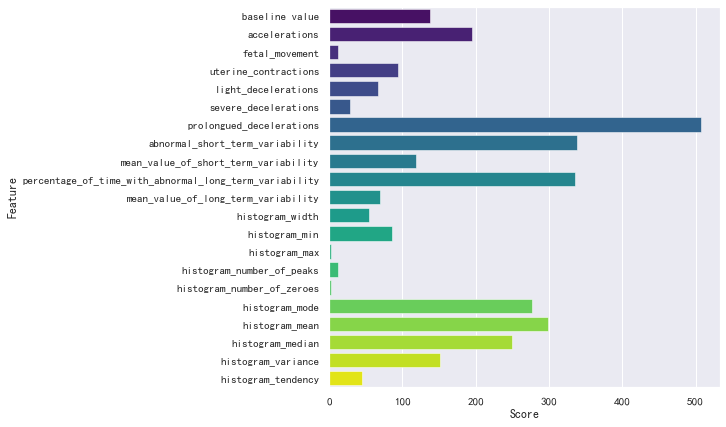

In [94]:
#特征和标签分离
X_1=data.drop(['fetal_health'], axis=1)
Y_1=data['fetal_health']
bestfeatures = SelectKBest(score_func=f_classif, k='all')

#拟合数据选取最好的特征
fit = bestfeatures.fit(X_1,Y_1)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_1.columns)

#把分数和特征向量拼接起来
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  

#查看各个特征的得分
fig, ax=plt.subplots(figsize=(7,7))
plot=sns.barplot(data=featureScores, x='Score', y='Feature', palette='viridis',linewidth=0.5, saturation=2, orient='h')
plot

可以看出还是3个关联度最高的特征分数最高，接下来可以选取分数大于200的特征。

In [52]:
selection=featureScores[featureScores['Score']>=200]#Selects features that scored more than 200
selection=list(selection['Feature'])#Generates the features into a list
selection.append('fetal_health')#Adding the Level string to be used to make new data frame
new_data=data[selection] #New dataframe with selected features
new_data.head()

,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,histogram_mode,histogram_mean,histogram_median,fetal_health
0,0.0,73.0,43.0,120.0,137.0,121.0,2.0
1,0.0,17.0,0.0,141.0,136.0,140.0,1.0
2,0.0,16.0,0.0,141.0,135.0,138.0,1.0
3,0.0,16.0,0.0,137.0,134.0,137.0,1.0
4,0.0,16.0,0.0,137.0,136.0,138.0,1.0


In [97]:
X1 = new_data.drop(['fetal_health'], axis=1)
y1 = new_data['fetal_health']

X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X1, y1, test_size=0.25, random_state=42)

In [104]:
#生成随机森林分类器
model = RandomForestClassifier()

#模型训练以及测试分数
model.fit(X_new_train, y_new_train)
model.score(X_new_test, y_new_test)

0.9527410207939508

In [107]:
model_pre = model.predict(X_new_test)

[Text(0.5, 0, '正常'), Text(1.5, 0, '疑似'), Text(2.5, 0, '病理')]

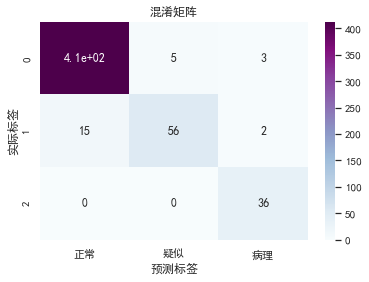

In [108]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_new_test, model_pre), annot=True, ax = ax, cmap = "BuPu")


ax.set_xlabel("预测标签")
ax.set_ylabel("实际标签")
ax.set_title("混淆矩阵")
ax.xaxis.set_ticklabels(["正常", "疑似", "病理"])

In [105]:
xgb = XGBClassifier()
xgb.fit(X_new_train, y_new_train)
xgb.score(X_new_test, y_new_test)

[18:35:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.943289224952741

In [109]:
xgb_pre = xgb.predict(X_new_test)

[Text(0.5, 0, '正常'), Text(1.5, 0, '疑似'), Text(2.5, 0, '病理')]

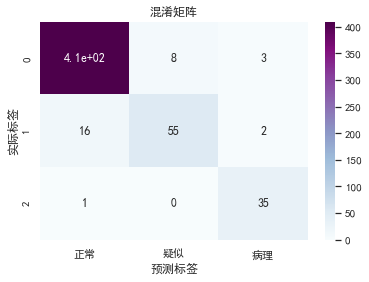

In [110]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_new_test, xgb_pre), annot=True, ax = ax, cmap = "BuPu")


ax.set_xlabel("预测标签")
ax.set_ylabel("实际标签")
ax.set_title("混淆矩阵")
ax.xaxis.set_ticklabels(["正常", "疑似", "病理"])

在删除一些特征之后，两个分类器的表现都下降了。

## 五、结论

1.真实的数据不会很好，要么有缺失、重复以及特征含义不清晰，要么数据分布不平衡，在数据的处理以及模型的选择上要下功夫思考，可以考虑用多个模型来拟合数据。

2.使用 KBestSelection可能使用数据集中最重要的特征，但可能实际表现不太好，所以在面对高维数据时特征选取一定要慎重。
使用RFC分类器上的网格搜索建模时，准确度有所提升。
RFC和XG Boost在不平衡数据集上的表现很好，测试准确率接近 96%。

3.也许使用归约技术作为预处理步骤可能有助于分离数据。接下来可以比较 PCA 和 LDA 降维技术以尝试进一步分离数据，以及在降维数据上重新训练模型以进行比较。（本人还对这方面不太了解，于是未作探索）